<a href="https://colab.research.google.com/github/BossMiman/Isc_Intellect/blob/master/Manov_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

**Подключаем библиотеки**

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

**Подготовка и преобразование данных в удобный формат**

In [2]:
# в Keras встроены средства работы с популярными наборами данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


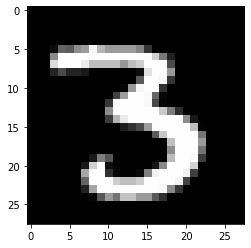

In [3]:
# вот примерчик базы 
n = 12

plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование в нужный формат**

In [0]:
# Не к элементам а к полю
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [0]:
# Применяются к каждому элементу массива по отдельности
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с данными**

In [6]:
# Мы сейчас проверили базу, и все хорошо(мы написали н из массива и удтвердили ей свое знгачение)
print(y_train_org[n])

3


In [0]:
# для нейронки
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [8]:
print(y_train.shape)

(60000, 10)


In [9]:
# Как нейронка выводит число? она сверяет с другими и вычисляет вероятность того или иного числа. Вот тут как раз округляется уже до целых, а так там все равно есть вероятность другого числа.
print(y_train[n])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**Фух, данные подготовили, теперь пора нейронку писать**

In [0]:
#модель нейронки (нейрон с нейроном связан по слоям)
model = Sequential()

In [0]:
# сейчас мы создаем слои с колличеством нейронов и входами(каждый нейрон за какой-то участок)
model.add(Dense(100, input_dim=784, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [12]:
# ееее мы сделали каркас нейронки
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________
None


**Сейчас самое сложное - это обучение**

In [13]:
model.fit(x_train, y_train, batch_size=200, epochs=5,  verbose=1, validation_split=0.2)# значит так. x и y train понятно epoches это колличество проходов, verbose 1 знчт показываем как нейронка себя чувствует. валид сплит это точность прохода

Epoch 1/5
240/240 [==============================] - 1s 5ms/step - loss: 0.5103 - accuracy: 0.8621 - val_loss: 0.2384 - val_accuracy: 0.9343
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 0.2124 - accuracy: 0.9392 - val_loss: 0.1812 - val_accuracy: 0.9499
Epoch 3/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.9543 - val_loss: 0.1489 - val_accuracy: 0.9585
Epoch 4/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1258 - accuracy: 0.9638 - val_loss: 0.1390 - val_accuracy: 0.9584
Epoch 5/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1049 - accuracy: 0.9697 - val_loss: 0.1212 - val_accuracy: 0.9633


loss и accuraty это когда нейронка ошибается и делает правильно( как раз наверху вероятность ) есть положительная динамика, хотя точность и без того высокая